<a href="https://colab.research.google.com/github/simodepth96/analytics-/blob/main/Analytcis_for_Content_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SEO Descriptive Analysis for Content Optimization

The following framework is designed to inspect a website's search traffic performance using descriptive analytics tool in order to drive efficient and data-informed decisions aimed at content optimization.


##Requirements

- An active billing account on Google Cloud to use the **GSC API via ecommercetools**


##Objects of the Analysis
**❗️Which articles to optimize first?** Use the *content decay* framework: the cluster with the most negative slope gets prioritized.

**❗️Where shall I expand my content?** Go by **Unique Query Count** and verify why some pages have high numbers.
You will find many long-tail opportunities to create new pages (or sections of your current page).

**❗️Which pages drag down my website?** *Query count by classes of clicks*.

##Crucial metrics to track

👉 **Unique Query Count**: This is crucial to see which pages have more opportunities.

👉 **Page Groups**: Dividing pages into groups based on their performance. E.g. pages with many clicks can be classified as "High Performers".

👉 **Content Decay**: it measures if your content has been losing traction (traffic)




#Disclaimer

**You won't be able to use this API for iProspect** because:
1. You need to set up a Billing account in Google Cloud
2. You need to become the owner of the Search Console property
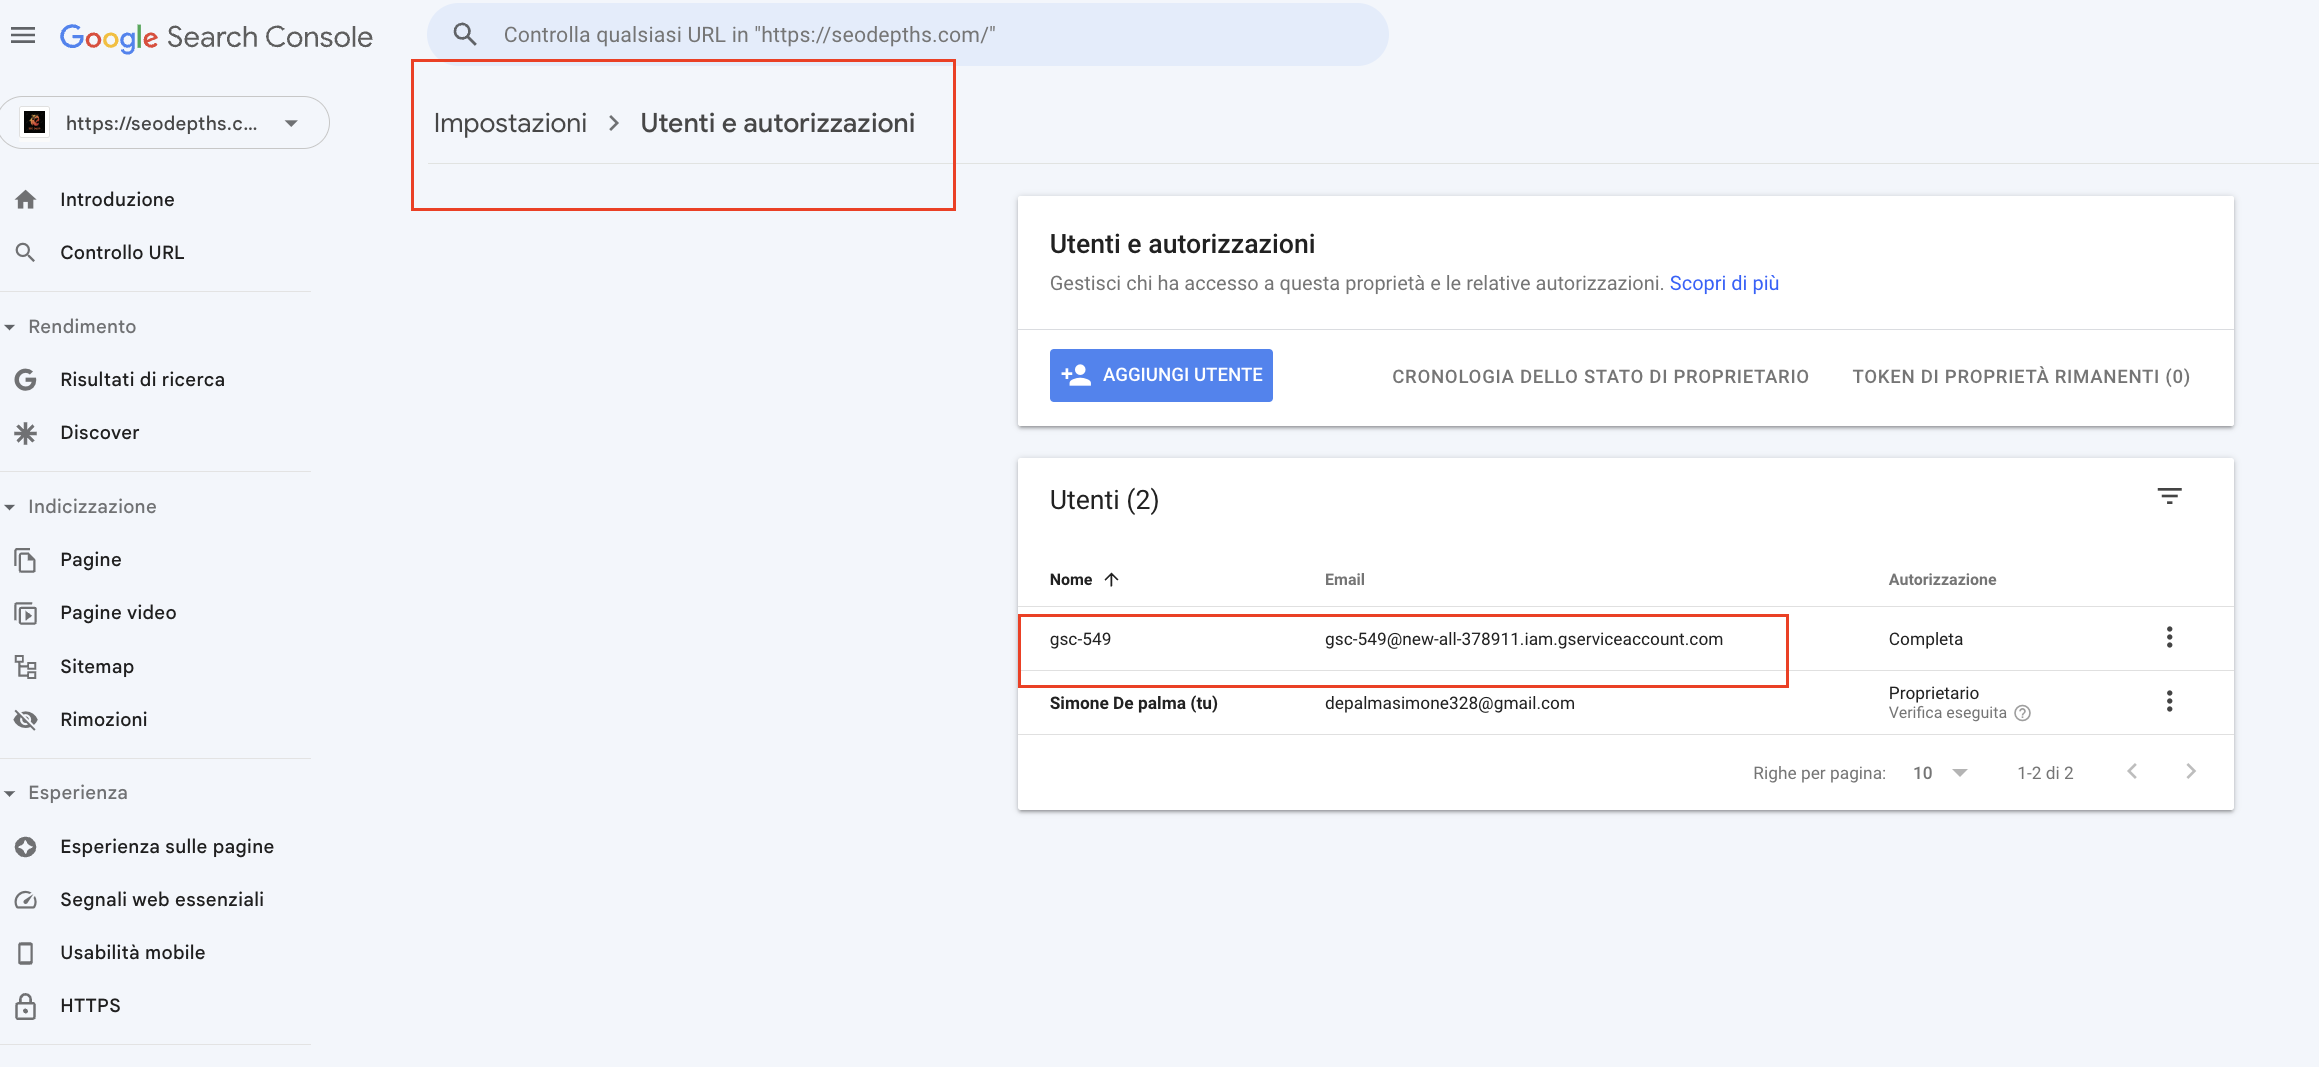





### This Framework works with an **active Billing account for unlimited Search Console extraction** for SEO Depth ONLY

app-scommese doesn't have the service account set up on GSC


In [ ]:
%%capture
!pip install ecommercetools oauth2client google-api-python-client httplib2 advertools plotly

In [ ]:
from google.oauth2 import service_account
from googleapiclient.discovery import build
import requests
import json
import numpy as np
import pandas as pd
from ecommercetools import seo
from oauth2client.client import OAuth2WebServerFlow
from googleapiclient.discovery import build
import httplib2
import plotly.express as px

# seo
import advertools as adv

# viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objects as go

# utils
import datetime
     
pd.set_option('max_colwidth', 100)

#Set the Time frame

In [ ]:
key = '/content/credentials_GSC_API.json'
site_url = 'https://seodepths.com/' #or "" 
start_date = "2022-05-20"
end_date = "2023-05-20"

# Load the General Payload

In [ ]:
payload = {
    'startDate': start_date, 
    'endDate': end_date,
    'dimensions': ["page","query","country","date","device"],  
    'rowLimit': 25000, #control the number of results returned 
    'startRow': 0
}

df = seo.query_google_search_console(key, site_url, payload)

#CTR manual calculation with lambda Lambda
df['% CTR'] = df.apply(lambda row: row['clicks']/row['impressions']*100,axis=1)

#data cleaning
df['% CTR'] = df['% CTR'].round(decimals = 2)
df = df.drop(['ctr'], axis=1)

#print
df.to_excel("GSC_Data.xlsx",index=False)
df.sort_values(by='clicks', ascending=False).head()

,page,query,country,date,device,clicks,impressions,position,% CTR
0,https://seodepths.com/,python seo,dnk,2022-10-14,DESKTOP,1,1,4.0,100.0
98,https://seodepths.com/python-for-seo/entity-competitor-analysis-nlp-python/,competitor analysis python,tha,2022-10-25,DESKTOP,1,1,9.0,100.0
92,https://seodepths.com/python-for-seo/entity-and-sentiment-analysis-python/,entity sentiment analysis python,usa,2023-03-28,DESKTOP,1,1,4.0,100.0
93,https://seodepths.com/python-for-seo/entity-and-sentiment-analysis-python/,python sentiment analysis,ltu,2023-05-14,DESKTOP,1,1,40.0,100.0
94,https://seodepths.com/python-for-seo/entity-and-sentiment-analysis-python/,sentiment analysis python tutorial,rus,2023-05-16,DESKTOP,1,1,25.0,100.0


#Data Cleaning

In [ ]:
#@title Drop Duplicates from the specified columns
df.drop_duplicates(['query', 'page'], inplace=True)

In [ ]:
# Get the number of rows in the dataframe
num_rows = df.shape[0]

# Print the number of rows
print('The dataframe has', num_rows, 'rows.')

The dataframe has 498 rows.


In [ ]:
#@title 1️⃣ Data cleaning: remove unnecessary Pages

# Define a list of strings to use as a filter for the 'Page' column
filter_page = ['wp','json','amp','page','notfound', 'legal', 'customer', 'statement','conditions', 'politique','mentions', 'index', 'code' 'privacy', 'cookie','note', 'credits']

# Use the '~' operator to negate the result of the 'str.contains()' method,
# and keep only the rows where the 'Address' column does NOT contain any of the filter strings
df = df[~df['page'].str.contains("|".join(filter_page))]

# Keep only the 'Address' column in the resulting DataFrame
#brand = brand[['Page']]

len(df.page.value_counts())

27

In [ ]:
#@title 2️⃣ Remove Non-ASCII characters
def is_ascii(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

# this line of code applies the function to the query column of the dataframe.
df = df[df['query'].map(lambda x: is_ascii(x))]


In [ ]:
#@title 3️⃣ Remove branded queries
df = df[~df['query'].str.contains('seo depth|simone|simone de palma|de palma|api', case=False)]
#brand.to_excel('ketring.xlsx',index=False)
print(len(df))
df


480


,page,query,country,date,device,clicks,impressions,position,% CTR
0,https://seodepths.com/,python seo,dnk,2022-10-14,DESKTOP,1,1,4.0,100.0
3,https://seodepths.com/,seo python,bra,2022-10-11,MOBILE,1,1,3.0,100.0
7,https://seodepths.com/python-for-seo/,python and seo,usa,2023-03-01,DESKTOP,1,1,43.0,100.0
8,https://seodepths.com/python-for-seo/,python for seo,arg,2022-10-29,MOBILE,1,1,34.0,100.0
13,https://seodepths.com/python-for-seo/,python for seo automation,esp,2023-02-08,MOBILE,1,1,21.0,100.0
...,...,...,...,...,...,...,...,...,...
24120,https://seodepths.com/python-for-seo/detect-google-tag-rewriting-serpapi/,google rewrite meta descriptions,gbr,2023-02-24,DESKTOP,0,1,97.0,0.0
24122,https://seodepths.com/python-for-seo/detect-google-tag-rewriting-serpapi/,google rewrite title,usa,2023-02-14,DESKTOP,0,1,47.0,0.0
24123,https://seodepths.com/python-for-seo/detect-google-tag-rewriting-serpapi/,google rewrites meta descriptions,arg,2022-10-26,DESKTOP,0,1,75.0,0.0
24125,https://seodepths.com/python-for-seo/detect-google-tag-rewriting-serpapi/,google rewriting title tags,aus,2022-12-30,DESKTOP,0,1,87.0,0.0


#Query Count in Top 10 Positions

While Impressions are a good leading indicator, they don't tell you anything about the queries you rank for.

**Counting the number of queries will help spot weak areas or pinpoint pages with more opportunities.**

In [ ]:
import seaborn as sns

# Convert 'position' column to integer and round off to 0
df['position'] = df['position'].round(0).astype('int64')

# Create a DataFrame with only the top 10 positions
filtered_df = df[df['position'] <= 10]

# Group query count by positions
top_10_count_queries = filtered_df.groupby('position').query.count().reset_index()

# Rename columns for readability
top_10_count_queries.rename(columns={
    'position': 'Position',
    'query': 'Count of Queries'
}, inplace=True)

# Apply conditional formatting to the DataFrame
cm = sns.light_palette("green", as_cmap=True)
styled_df = top_10_count_queries.style.background_gradient(cmap=cm)

# Display the styled DataFrame
styled_df


,Position,Count of Queries
0,1,27
1,2,5
2,3,2
3,4,3
4,5,4
5,6,3
6,7,2
7,8,2
8,9,3
9,10,3


In [ ]:
#@title Plotting a Line Series (Poisson distribution) with the number of Unique Queries over time
#convert date to proper format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

#Extract months from date
filtered_df['month'] = filtered_df['date'].dt.month

#plot number of unique queries over time
top_10_count_queries_df = filtered_df.groupby("month").agg(
    clicks = ('clicks', 'sum'),
    impressions = ('impressions', 'sum'),
    position = ('position', 'mean'),
    count_queries = ('query', 'count')
    ).reset_index()

fig = px.line(top_10_count_queries_df, x="month", y="count_queries",
              labels={'month': 'Date', 'count_queries': 'Unique Queries'},
              title="No. of Unique Queries Ranking in Top 10 Positions",
              template = 'plotly_dark')

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Unique Queries')

fig.show()


<ipython-input-33-82773cd4375d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-82773cd4375d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data Transformation: Query Count Tracking by Classes of Clicks

**Data transformation** is the process to convert data from one format to another, e.g. from a number to a class.

It means creating new metrics that are tailored to you.

This part will help us **divide pages into groups based on their performance** by creating new metrics.

---

## We are going to reuse `df` in the following section. 
##🔦 **Have a look at GSC_Data.xlsx before starting the next section**: if there are no clicks, the  following script won't return anything




In [ ]:
#keywords a Page is ranking for
df['n_kws_Page_ranks_for'] = df['page'].map(df.groupby('page')['page'].count())
rows = len(df)
df['percent_kws_Page_ranks_for'] = (df['n_kws_Page_ranks_for'] / rows * 100).round(2)

#feature engineering 
df.fillna({"impressions": 0, "clicks": 0, "position": 0}, inplace=True)
df = df.astype({"impressions": int, "clicks": int, "position": int})
#create new colummns
df['total_Clicks_Page'] = df['clicks'].groupby(df['page']).transform('sum')
df['total_Page_imps_percent'] = df['impressions'].groupby(df['page']).transform('sum')
#percentages
df['total_Page_Clicks_percent'] = (df['total_Clicks_Page'] / sum(df['clicks']) * 100).round(2)
df['Page_percent_imps'] = (df['total_Page_imps_percent'] / sum(df['impressions']) * 100).round(2)
df = df.round(2)

#add leading queries
df.drop_duplicates(inplace=True)

# Group the data by the URL and sort the queries by the number of Clicks
df_clicks = df.groupby('page')['query', 'clicks'].apply(lambda x: x.sort_values('clicks', ascending=False))

# Select the first row of each group (the Query with the highest number of Clicks)
df_clicks = df_clicks.groupby('page').first()

# Group the data by the URL and sort the queries by the number of Impressions
df_impressions = df.groupby('page')['query', 'impressions'].apply(lambda x: x.sort_values('impressions', ascending=False))

# Select the first row of each group (the Query with the highest number of Impressions)
df_impressions = df_Impressions.groupby('page').first()

df['leading_Query_by_Clicks'] = df['page'].map(df_clicks['query'])
df['leading_Query_by_Impressions'] = df['page'].map(df_impressions['query'])

<ipython-input-35-8d2b909d07a4>:21: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-35-8d2b909d07a4>:27: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

# Find number of bins with Sturges' Rule
n_bins = 1 + int(np.log(len(df)))

# Create bands based on Clicks
def label_bands(row):
    if row['clicks'] == 0:
        return '0-click'
    if row['clicks'] == 1:
        return '1-click'
    if 2 <= row['clicks'] <= 20:
        return '2-to-20'
    if 21 <= row['clicks'] <= 100:
        return '21-100'
    return '100+'

grpd = df.groupby(["query"]).agg({"clicks": "sum"}).sort_values(by="clicks", ascending=False)
grpd['Clicks_category'] = grpd.apply(label_bands, axis=1)
df = df.merge(right=grpd.reset_index()[['query', 'Clicks_category']], on="query", how="inner")

# Create bands based on Impressions
def label_bands_Impressions(row):
    if row['impressions'] == 1:
        return '1-imp'
    if 2 <= row['impressions'] <= 20:
        return '2-to-20'
    if 21 <= row['impressions'] <= 100:
        return '21-100'
    return '100+'

grpd = df.groupby(["query"]).agg({"impressions": "sum"}).sort_values(by="impressions", ascending=False)
grpd['Impressions_category'] = grpd.apply(label_bands_Impressions, axis=1)
df = df.merge(right=grpd.reset_index()[['query', 'Impressions_category']], on="query", how="inner")

# Plot Clicks by month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

def plot_Clicks_by_month(df):
    # Group the data by Clicks category and month, and count the number of unique queries
    df = df.groupby(['Clicks_category', 'month']).query.nunique().reset_index()

    # Create a line chart using Plotly
    fig = px.line(df, x='month', y='query', color='Clicks_category',
                  template='plotly_dark', width=1024, height=600, labels={'month': 'Month', 'query': 'Unique Query Count'})
    fig.update_xaxes(dtick="M1", tickformat="%Y-%m")
    fig.update_yaxes(autorange=True)
    fig.show()

plot_Clicks_by_month(df)


# Content Decay

find **what pages are running faster towards content expiration** and therefore may need to be refreshed


##🔦 We are interested in pages with extremely negative values (**slope**)

In [ ]:
#create new time variables 
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
#grouping and aggregating clicks 
g = df.groupby(['page','month']).agg({'clicks': 'sum'})
#now you have a list of non-duplicate pages
unique_pages = list(g.reset_index().page.unique())

In [ ]:
#initialize empty list
container = []
#loop over the list unique_pages with an index
for i, page in enumerate(unique_pages):
    res = {} #initialize empty dictionary
    subset = g.loc[page]
    x = list(subset.index)
    y = subset.clicks.values
    
    # fit model
    try:
        slope, intercept = np.poly1d(np.polyfit(x, y, 1)) #get slope and intercept of the line
        slope = round(slope, 2) #round slope values to 2 digits
    except: #if there is an error, set the slope to None
        slope = None
        intercept = None

    #assign values to the empty dictionary we initialited before
    res['page'] = page
    res['slope'] = slope
    container.append(res)

#convert the dictionary into a dataframe
slope_df = pd.DataFrame(container).sort_values(by='slope', ascending=True)
slope_df.to_excel('slope.xlsx',index=False)
slope_df.head(25)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may

,page,slope
5,https://seodepths.com/python-for-seo/broken-backlinks-audit-pyhton/,0.5
13,https://seodepths.com/python-for-seo/core-web-vitals-audit-automation-python/,0.5
16,https://seodepths.com/python-for-seo/duplicate-content-audit-python/,0.5
20,https://seodepths.com/python-for-seo/how-metadescription-impact-rankings/,0.5
21,https://seodepths.com/python-for-seo/semantic-market-analysis-for-seo/,0.5
24,https://seodepths.com/seo-news/python-for-seo/sitemap-audit-python/,0.5
25,https://seodepths.com/seo-research/how-nlp-nlu-can-affect-seo/,0.5
0,https://seodepths.com/,1.0
6,https://seodepths.com/python-for-seo/build-similarity-tool-seo-python/,1.0
18,https://seodepths.com/python-for-seo/entity-competitor-analysis-nlp-python/,1.0


In [ ]:
#@title Use quantiles and find the top 10% of pages with the most content decay. 

slope_df[slope_df['slope'] < 1] #arbitrary value, can use what you want


,page,slope
5,https://seodepths.com/python-for-seo/broken-backlinks-audit-pyhton/,0.5
13,https://seodepths.com/python-for-seo/core-web-vitals-audit-automation-python/,0.5
16,https://seodepths.com/python-for-seo/duplicate-content-audit-python/,0.5
20,https://seodepths.com/python-for-seo/how-metadescription-impact-rankings/,0.5
21,https://seodepths.com/python-for-seo/semantic-market-analysis-for-seo/,0.5
24,https://seodepths.com/seo-news/python-for-seo/sitemap-audit-python/,0.5
25,https://seodepths.com/seo-research/how-nlp-nlu-can-affect-seo/,0.5


In [ ]:
# how many loser pages
losers = slope_df[slope_df.slope < 0]
winners = slope_df[slope_df.slope >= 0]

In [ ]:
len(losers)

0

In [ ]:
len(winners)

16